<a id="Cover Page"></a>
    
<font color=black>
    <center>
# INDIAN INSTITUTE OF TECHNOLOGY
# GUWAHATI
## Department of Electronics & Electrical Engineering
## EE657: Pattern Recognition and Machine Learning
    
</font>
<img src="https://upload.wikimedia.org/wikipedia/en/thumb/1/12/IIT_Guwahati_Logo.svg/1200px-IIT_Guwahati_Logo.svg.png" alt="IIT Logo" title="IITG" height="150" width="150" class="center"/>
## Assignment No. 02
<hr>
### Name: Shubham
### Roll Number: 150102079
### Branch: Electronics and Communication Engineering
### Title: Decision Tree Classifier and Regressor
### Date: 27-04-2018
<hr>
<br>

<center><u>

## Assignment - 2.P1         

</center></u><br>

**Objective**: With the given training set, build a decision tree classifier. Use decision trees to classify the test data. Estimate the misclassification rates of both classes and populate the 2x2 confusion matrix.
<p>(i) Report the following: (a) Plot of decision tree model. 
(b) the total number of nodes in the tree.
(c) the total number of leaf nodes in the tree.</p>
<p>(ii) Train your binary decision tree with increasing sizes of training set, say 10%, 20%, ..., 100%.
and test the trees with the test set. Make a plot to show how training and test accuracies vary with
number of training samples.</p>
<hr>
<br>**Dataset Description**: *Wisconsin Diagnostic Breast Cancer(WDBC) dataset from the UCI repository*.<br>
<p>&#9658; Train data consisting of 455 samples, 30 attributes. A label of value 1 indicates the sample was
for malignant (cancerous) tissue, 0 indicates the sample was for benign tissue.</p>
<p>&#9658; Test data consisting of 57 samples, 30 attributes. A label of value 1 indicates the sample was
for malignant (cancerous) tissue, 0 indicates the sample was for benign tissue.</p>
<hr>
<br>**Summary of the experiment**: 
<p>&#9658; Using the given training dataset, built a decision tree classifier using **sklearn.tree.DecisionTreeClassifier** library module and used "*entroypy*" as criterion. Used **sklearn.metrics** module to estimate overall test accuracy and populate the confusion matrix. </p>
<p>&#9658; Further used **sklearn.tree.export graphviz** module to plot the built decision tree classifier. Used **binary tree algorithm** to report total no. of nodes and no. of leaves in the decision tree. </p>
<p>&#9658; In the second part of the objective, we randomly sampled 10%, 20%, ..., 100% of the training data using **numpy.random.choice** function, and built corresponding decision tree classifier and recorded its train and test accuracies. Finally, a plot was generated to show variation of training and test accuracies with number of training samples.</p>
<hr>

<a id="Report"></a>
<br>**Observations**: <font color=red>(Click on the links provided to see observations and click on "Go back to report" to come back here.)</font>
-  The misclassification rates of both classes and 2x2 confusion matrix are as follows: <br>
Total Test Accuracy = 0.95<br>
Missclassification rate of Malignant Class= 0.00<br>
Missclassification rate of Benign Class= 0.12<br>
<br>
Confusion Matrix:<br>
[32  0]<br>
[ 3 22]<br>
[Go to Test Accuracy and Confusion Matrix](#Test Accuracy and Confusion Matrix)
-  **(i.a)** Plot of decision tree model: <br>
[Go to Plot of decision tree model](#Plot of decision tree model)
-  **(i.b & i.c)** The total number of nodes and leaf nodes in the tree: <br>
Total No. of nodes =  29<br>
Total No. of leaves =  15<br>
[Go to The total number of nodes and leaf nodes in the tree](#The total number of nodes and leaf nodes in the tree)
-  **(ii)** Plot and values of Train and Test accuracies with variation of size of training data: <br>
Average Test Accuracy = 0.89<br>
[Go to Random sampling train & test accuracies](#Random sampling train & test accuracies)
<br>[Go to Plot of variation of training and test accuracies with number of training samples](#Plot of variation of training and test accuracies with number of training samples)<br>
<hr>

**Conclusions**: <br>
<p>&#x25BA; In the experiment, decision tree classifier is built based on entropy measure maximisation at each node.<br>
Entropy: φ(p,1−p)=−((p $log_{2}$p)+((1−p) $log_{2}$(1−p)))</p>
<p>&#x25BA; A critical factor in designing a tree is its size. The size of a tree must be large enough but not too large; otherwise it tends to learn the particular details of the training set and exhibits poor generalization performance.
Hence, there will be a problem of over-fitting while learning a decision tree without any restrictions on its size. This can
be clearly observed in "Training accuracies vs size of training data" plot in part **(ii)**. 
</p>
<p>&#x25BA; **(Total no. of nodes in the tree - Total no. of leaves)** is less then the **total no. of features(30)**. Hence, all the features may or may not be used while building a decision tree based on its importance. The features which provide higher information gain at each node are more useful and will be used, i.e. the decision tree is built in some sort of greedy fashion at each node.</p>
<p>&#x25BA; Benefits with decision trees: High interpretability, less data cleaning required i.e. can be used with any form of data.</p>
<p>&#x25BA; It can observed from "Test accuracies vs size of training data" plot in part **(ii)** that if the dataset size is small, then the test accuracy is less and is improved as the training samples are increasing. The reasoning is that it still requires data to improve i.e. learning curve is still increasing or tree consists of fewer or less complex features. At around 40% of training dataset, maximum test accuracy is achieved and then test accuracy becomes almost constant. Hence, tree built now is over fitted with training dataset, and is not able to generalise any further, as it has learnt the particulars of training dataset.</p>
<hr>

# CODE with plots:

In [1]:
#Importing required libraries ...

import os
import sys
import numpy as np
import collections
from sklearn import metrics
from sklearn.externals.six import StringIO 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Loading train and test data with labels ...

train_data = np.genfromtxt('trainX.csv',delimiter=',')
test_data = np.genfromtxt('testX.csv',delimiter=',')

train_label = np.genfromtxt('trainY.csv',delimiter=',')
test_label = np.genfromtxt('testY.csv',delimiter=',')

#print(train_data.shape)
#print(test_data.shape)

In [3]:
#Building decision tree classifier on given training dataset ... 

dtree = DecisionTreeClassifier(criterion = "entropy")
dtree.fit(train_data, train_label)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<a id="Test Accuracy and Confusion Matrix"></a>
[Go back to Report](#Report)

In [4]:
#Reporting test accuracy and populating confusion matrix ... 

expected = test_label
predicted = dtree.predict(test_data)
print("Total Test Accuracy = %.2f" %metrics.accuracy_score(expected, predicted))
print("Missclassification rate of Malignant Class= %.2f" %(1-metrics.precision_score(expected, predicted)))
print("Missclassification rate of Benign Class= %.2f\n" %(1-((57*metrics.accuracy_score(expected, predicted)-\
                                                             32*metrics.precision_score(expected, predicted))/25)))
print('Confusion Matrix:')
print('[True Malignant  False Malignant]')
print('[False Benign    True Benign    ]\n')
print(metrics.confusion_matrix(expected, predicted))

Total Test Accuracy = 0.95
Missclassification rate of Malignant Class= 0.00
Missclassification rate of Benign Class= 0.12

Confusion Matrix:
[True Malignant  False Malignant]
[False Benign    True Benign    ]

[[32  0]
 [ 3 22]]


In [5]:
#List of features ... 

features = ['Avg Radius', 'Avg Texture', 'Avg Perimeter', 'Avg Area', 'Avg Smoothness', 'Avg Compactness', 'Avg Concavity', \
            'Avg Number of concave portions of contour', 'Avg Symmetry', 'Avg Fractal dimension', \
            'StD Radius', 'StD Texture', 'StD Perimeter', 'StD Area', 'StD Smoothness', 'StD Compactness', 'StD Concavity', \
            'StD Number of concave portions of contour', 'StD Symmetry', 'StD Fractal dimension', \
            'Max Radius', 'Max Texture', 'Max Perimeter', 'Max Area', 'Max Smoothness', 'Max Compactness', 'Max Concavity', \
            'Max Number of concave portions of contour', 'Max Symmetry', 'Max Fractal dimension']

In [6]:
#Function to fix the problem with compatibility of graphviz with conda ...

def conda_fix(graph):
        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
        paths = ("dot", "twopi", "neato", "circo", "fdp")
        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
        graph.set_graphviz_executables(paths)

<a id="Plot of decision tree model"></a>
[Go back to Report](#Report)

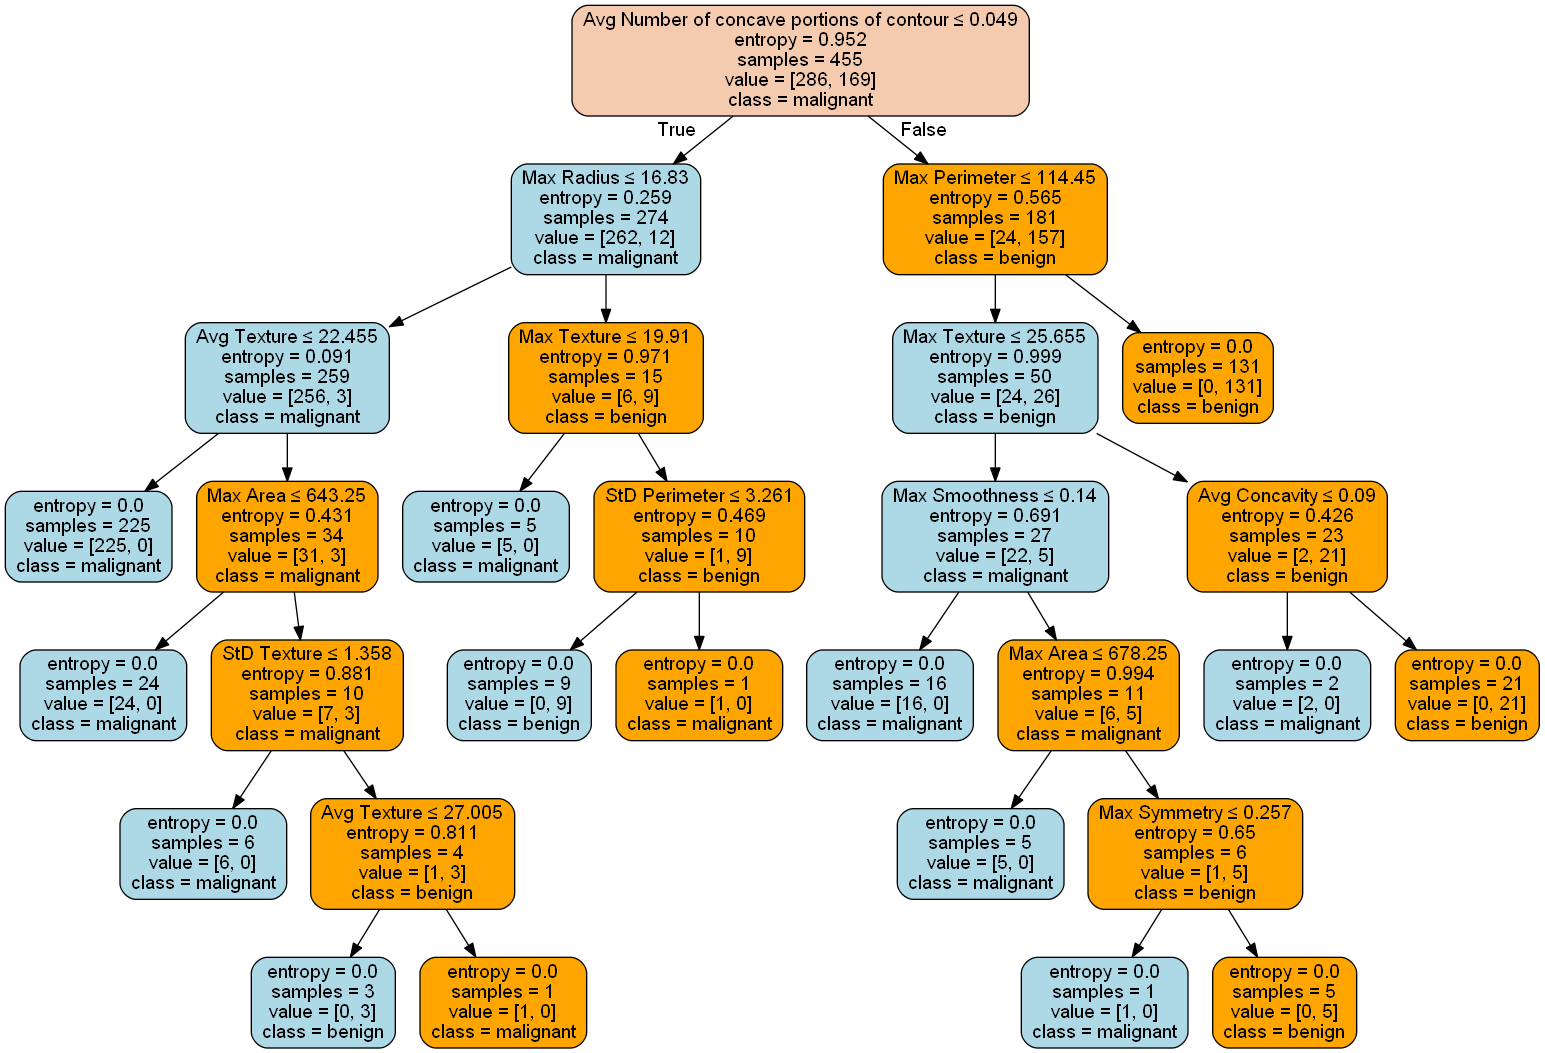

In [7]:
#Plotting the learnt decision tree classifier ...

dot_data = export_graphviz(dtree, out_file=None, feature_names=features, class_names=['malignant', 'benign'], \
                           filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data) 
colors = ('lightblue', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
conda_fix(graph)
Image(graph.create_png())

<a id="The total number of nodes and leaf nodes in the tree"></a>
[Go back to Report](#Report)

In [8]:
#Calculating no. of nodes and no. of leaves in the learnt decision tree ...

n_nodes = dtree.tree_.node_count
children_left = dtree.tree_.children_left
children_right = dtree.tree_.children_right
leaves = 0

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1
    
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        leaves = leaves + 1
print('Total No. of nodes = ', n_nodes)

print('Total No. of leaves = ', leaves)

Total No. of nodes =  29
Total No. of leaves =  15


<a id="Random sampling train & test accuracies"></a>
[Go back to Report](#Report)

In [9]:
#Randomly sampling 10%, 20%, ..., 100% of the training data and builing corresponding decision tree classifier ... 
#Recording for each of them train and test accuracies ... 

train_accuracy = np.zeros(10)
test_accuracy = np.zeros(10)
for i in range(1,11):
    print("Randomly sampling %d0" %i, "% of training data..." )
    t = np.random.choice(455, (455*i)//10)
    #print(t)
    x = train_data[t]
    y = train_label[t]
    #Fit Tree
    dtree = DecisionTreeClassifier(criterion = "entropy")
    dtree.fit(x, y)
    #Train Accuracy
    expected = y
    predicted = dtree.predict(x)
    train_accuracy[i-1] = metrics.accuracy_score(expected, predicted)
    print("Train Accuracy = %.2f" %train_accuracy[i-1])
    #Test Accuracy
    expected = test_label
    predicted = dtree.predict(test_data)
    test_accuracy[i-1] = metrics.accuracy_score(expected, predicted)
    print("Test Accuracy = %.2f\n" %test_accuracy[i-1])
    
    print("Average Test Accuracy = %.2f" %np.average(test_accuracy))

Randomly sampling 10 % of training data...
Train Accuracy = 1.00
Test Accuracy = 0.82

Average Test Accuracy = 0.08
Randomly sampling 20 % of training data...
Train Accuracy = 1.00
Test Accuracy = 0.86

Average Test Accuracy = 0.17
Randomly sampling 30 % of training data...
Train Accuracy = 1.00
Test Accuracy = 0.77

Average Test Accuracy = 0.25
Randomly sampling 40 % of training data...
Train Accuracy = 1.00
Test Accuracy = 0.89

Average Test Accuracy = 0.34
Randomly sampling 50 % of training data...
Train Accuracy = 1.00
Test Accuracy = 0.95

Average Test Accuracy = 0.43
Randomly sampling 60 % of training data...
Train Accuracy = 1.00
Test Accuracy = 0.95

Average Test Accuracy = 0.52
Randomly sampling 70 % of training data...
Train Accuracy = 1.00
Test Accuracy = 0.91

Average Test Accuracy = 0.62
Randomly sampling 80 % of training data...
Train Accuracy = 1.00
Test Accuracy = 0.93

Average Test Accuracy = 0.71
Randomly sampling 90 % of training data...
Train Accuracy = 1.00
Test Ac

<a id="Plot of variation of training and test accuracies with number of training samples"></a>
[Go back to Report](#Report)

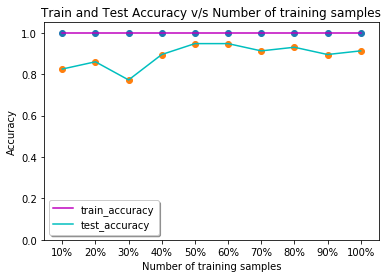

In [10]:
#Plot to show variation of training and test accuracies with number of training samples ...

percentage = ["10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"]

plt.plot(percentage, train_accuracy,'m', label='train_accuracy')
plt.scatter(percentage, train_accuracy, cmap=plt.cm.get_cmap('cubehelix', 1))
plt.plot(percentage, test_accuracy,'c', label='test_accuracy')
plt.scatter(percentage, test_accuracy, cmap=plt.cm.get_cmap('cubehelix', 1))
plt.ylim((0,1.05))

legend = plt.legend(loc='lower left', shadow=True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title("Train and Test Accuracy v/s Number of training samples")

plt.show()

[Go back to Cover Page](#Cover Page)